In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import econtools as econ
import econtools.metrics as mt
import math

<h3>The relathionship between inaccurate self-assessment and performance goals</h3>

In [2]:
df, meta = pyreadstat.read_sav("df.sav")

In [3]:
len(df)

2747

In [4]:


df_sat = pd.read_excel("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/수능(2005-2009학년도) DATA(Layout 포함)/수능 DATA(2008-2009학년도)_중학교 3학년생 코호트.xlsx")

In [5]:
# df_sat missing values = all nan/ seoncd score에는 nan이 많음 왜? 재수 안 한 사람들이 많으니깐

In [6]:
df_sat = df_sat[["AT08_32","AT08_33","AT08_34","AT09_32","AT09_33","AT09_34","BYSID"]]
df_sat["total_score_1"] = df_sat["AT08_32"] + df_sat["AT08_33"] + df_sat["AT08_34"]
df_sat["total_score_2"] = df_sat["AT09_32"] + df_sat["AT09_33"] + df_sat["AT09_34"]

In [7]:
# self assessment = ['F3S01129']
df_sat_temp = df_sat[['BYSID','total_score_1','total_score_2']]
df_temp = pd.merge(df, df_sat_temp)

In [8]:
df_temp

,BYSID,BYHID,GENDER,BYSCLASS,region,schooltype,F2S01004,F2S01005,F2S01006,F2S01007,...,F3H12025,F3H12026,F3H12027,F3H13001,F3H13002,F3H13003,F3H13004,income_rank_p,total_score_1,total_score_2
0,1003.0,10031.0,1.0,1.0,8.0,7.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547619,17.0,NaN
1,1003.0,10031.0,1.0,1.0,8.0,7.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,2.0,1.0,1.0,2.0,0.369748,17.0,NaN
2,1007.0,10071.0,1.0,1.0,2.0,7.0,2.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.511905,19.0,NaN
3,1007.0,10071.0,1.0,1.0,2.0,7.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,3.0,1.0,2.0,3.0,0.613445,19.0,NaN
4,1008.0,10081.0,1.0,1.0,8.0,7.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.452381,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,7921.0,79211.0,1.0,1.0,6.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,1.0,1.0,0.0,1.0,0.529412,27.0,NaN
1469,7924.0,79241.0,1.0,1.0,10.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,-5.0,-5.0,2.0,1.0,1.0,2.0,0.268908,14.0,NaN
1470,7926.0,79261.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,2.0,1.0,1.0,2.0,0.445378,NaN,NaN
1471,7927.0,79271.0,1.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,1.0,2.0,3.0,1.0,2.0,3.0,0.478992,23.0,NaN


In [9]:
# beliefs missing value
df_temp = df_temp[df_temp['F3S01129']>0]
df_temp = df_temp[df_temp['total_score_1']>0]
len(df_temp) #1231

1231

In [10]:
# gap between self-assessment and actual attainments
# total score average 
df_temp['total_score_1'] = df_temp['total_score_1']/3
#df_temp['total_score_2'] = df_temp['total_score_2']/3
df_temp['belief_gap'] = df_temp['F3S01129'] - df_temp['total_score_1']

In [11]:
# perfshare
df_temp['perf'] = df_temp['favorablejudg']+df_temp['negativejudg']
df_temp['perfshare'] = df_temp['perf'] / (df_temp['perf'] + df_temp['learning'])

#exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year']
#print(mt.reg(df, 'perfshare', exog))

In [12]:
len(df_temp[df_temp['belief_gap']<0]) # underestimate 913 out of 1346
len(df_temp[df_temp['belief_gap']>0]) # overestimate 259 out of 1346
len(df_temp[df_temp['belief_gap']==0]) # accurate 59 out of 1346

59

In [13]:
df_temp['belief_gap_abs'] = abs(df_temp['belief_gap'])

In [64]:
np.corrcoef(df_temp['belief_gap_abs'], df_temp['perfshare'])

array([[1.        , 0.00464427],
       [0.00464427, 1.        ]])

In [17]:
stat_b_gap = df_temp['belief_gap_abs'].describe().round(2)
stat_b_gap.to_latex('stat_b_gap.tex')

In [22]:
df_temp.loc[df_temp['belief_gap_abs'] == 8.0, 'F3S01129']

1424    1.0
Name: F3S01129, dtype: float64

In [67]:
exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year','belief_gap_abs','total_score_1']
print(mt.reg(df_temp, 'perfshare', exog))

Dependent variable:	perfshare
N:			1231
R-squared:		0.0230
Estimation method:	OLS
VCE method:		Standard (Homosk.)
                coeff    se      t   p>t CI_low CI_high
income_rank_p  -0.015 0.015 -0.978 0.328 -0.044   0.015
region         -0.000 0.001 -0.100 0.920 -0.001   0.001
schooltype      0.001 0.001  0.523 0.601 -0.001   0.003
GENDER         -0.006 0.006 -0.956 0.339 -0.017   0.006
year            0.000 0.000 43.770 0.000  0.000   0.000
belief_gap_abs -0.004 0.002 -1.517 0.130 -0.008   0.001
total_score_1   0.008 0.002  4.556 0.000  0.004   0.011



In [23]:
# 3rd round self-assessment ['F2S01109']
df_temp = df_temp[df_temp['F2S01109']>0]
df_temp['belief_gap2'] = df_temp['F2S01109'] - df_temp['total_score_1']
df_temp['belief_gap_abs2'] = abs(df_temp['belief_gap2'])
df_temp['F2S01109'].value_counts()
np.corrcoef(df_temp['belief_gap_abs2'], df_temp['perfshare'])

C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\thxkn\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\thxkn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan],
       [nan, nan]])

In [78]:
df[df['F2S01109']>0] #412명

,BYSID,BYHID,GENDER,BYSCLASS,region,schooltype,F2S01004,F2S01005,F2S01006,F2S01007,...,F3H12026,F3H12027,F3H13001,F3H13002,F3H13003,F3H13004,income_rank_p,perf,pefshare,perfshare
0,1003.0,10031.0,1.0,1.0,8.0,7.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.547619,6.0,0.666667,0.666667
1,1005.0,10051.0,1.0,1.0,15.0,5.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.380952,4.0,0.571429,0.571429
2,1007.0,10071.0,1.0,1.0,2.0,7.0,2.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.511905,6.0,0.666667,0.666667
3,1008.0,10081.0,1.0,1.0,8.0,7.0,2.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.452381,7.0,0.777778,0.777778
4,1010.0,10101.0,1.0,1.0,8.0,7.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,5.0,0.625000,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2980.0,29801.0,0.0,1.0,11.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,7.0,0.777778,0.777778
410,2981.0,29811.0,1.0,1.0,8.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.416667,7.0,0.700000,0.700000
411,2985.0,29851.0,0.0,1.0,3.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.321429,6.0,0.666667,0.666667
412,2986.0,29861.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.273810,7.0,0.700000,0.700000


<h2>Self-Assessment Real Proxy for Each Subjects</h2>

In [24]:
# 과목 잘한다 (1 전혀 그렇지 않다 - 5 매우 그렇다)
df_b = pd.merge(df, df_sat)

df_b = df_b[df_b['F3S01100']>0]
df_b = df_b[df_b['F3S01103']>0]
df_b = df_b[df_b['F3S01106']>0]

df_b = df_b.rename(columns = {'F3S01100': 'korean_b', 'F3S01103': 'math_b', 'F3S01106':'eng_b'})
df_b = df_b.rename(columns = {"AT08_32": 'korean_sat',"AT08_33": 'math_sat',"AT08_34": 'eng_sat'})

df_b = df_b[df_b['korean_sat']>0]
df_b = df_b[df_b['math_sat']>0]
df_b = df_b[df_b['eng_sat']>0]

In [25]:
beliefs = ['korean_b','math_b','eng_b']
sat = ['korean_sat', 'math_sat', 'eng_sat']

subjects = ['korean', 'math', 'eng']

for b in beliefs:
    df_b[b] = (5-df_b[b]) + 1

In [26]:
df_b['korean_b'].isna().value_counts()

False    1239
Name: korean_b, dtype: int64

In [27]:
subjects = ['korean', 'math', 'eng']

for s in subjects:
    df_b[s+'_b_gap'] = df_b[s+'_b'] - df_b[s+'_sat']
    #print(len(df_b[df_b[s+'_b_gap']<0])) # underestimate themselves
    
for s in subjects:
    df_b[s+'_b_gap_abs'] = abs(df_b[s+'_b_gap'])

In [32]:
b_gap = df_b[['korean_b_gap','math_b_gap', 'eng_b_gap']].describe().round(2)
b_gap.to_latex('b_gap_nonabs.tex')

In [28]:
df['total_b_gap_abs'] = (df_b['korean_b_gap_abs'] + df_b['math_b_gap_abs'] + df_b['eng_b_gap_abs'])/3

In [30]:
b_gaps = df['total_b_gap_abs'].describe().round(2)
b_gaps.to_latex('b_gaps.tex')

In [101]:
df_b['perf'] = df_b['favorablejudg']+df_b['negativejudg']
df_b['perfshare'] = df_b['perf'] / (df_b['perf'] + df_b['learning'])

for s in subjects:
    print(np.corrcoef(df_b[s+'_b_gap_abs'], df_b['perfshare']))

[[1.         0.09225555]
 [0.09225555 1.        ]]
[[1.         0.03512973]
 [0.03512973 1.        ]]
[[1.         0.07978247]
 [0.07978247 1.        ]]


In [106]:
exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year','perfshare']
print(mt.reg(df_b, 'korean_b_gap_abs', exog))

Dependent variable:	korean_b_gap_abs
N:			1239
R-squared:		0.0970
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -1.742 0.230 -7.574 0.000 -2.193  -1.290
region        -0.009 0.010 -0.952 0.341 -0.028   0.010
schooltype    -0.076 0.015 -5.194 0.000 -0.105  -0.047
GENDER         0.551 0.091  6.057 0.000  0.373   0.729
year           0.001 0.000  7.154 0.000  0.001   0.002
perfshare      1.389 0.454  3.056 0.002  0.497   2.281



<h2> parents </h2>

In [107]:
df_HH1, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/1차년도(2004) DATA/중학교 3학년생 코호트/by_m_household.sav")

In [108]:

# 1 : parents 2: father, 3: mother 

0       5.0
1       5.0
2       5.0
3       7.0
4       3.0
       ... 
1946    5.0
1947    7.0
1948    4.0
1949    5.0
1950    7.0
Name: BYH26006, Length: 1951, dtype: float64

In [110]:
#educational background of legal guradians'BYH26006', 'BYH27006'
df_HH1['BYH26006'].value_counts()
#df_HH1['BYH27006'].isna().value_counts()

 5.0    945
 7.0    413
 4.0    205
 6.0    113
-4.0    106
 3.0     86
 8.0     52
 9.0     18
 2.0      8
-3.0      5
Name: BYH26006, dtype: int64

In [112]:
df_HH1['BYH27006'].value_counts()

 5.0    1141
 4.0     309
 7.0     217
 3.0     105
 6.0      66
-4.0      55
 8.0      27
 2.0      18
 9.0       8
-3.0       5
Name: BYH27006, dtype: int64

In [116]:
df_HH1['parental_edu'] = df_HH1[['BYH26006','BYH27006']].max(axis = 1)

In [118]:
df_HH1 = df_HH1[df_HH1['parental_edu']>0]

In [121]:
df_b_p = pd.merge(df_b, df_HH1)

In [140]:
len(df_b_p)

875

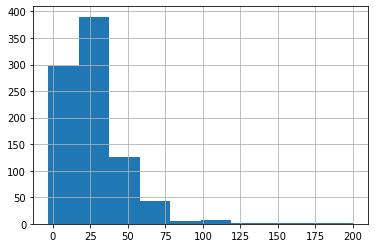

In [127]:
# 사교육비 BYH22002
df_b_p['BYH22002'].hist()

In [122]:
exog = ['income_rank_p', 'region', 'schooltype', 'GENDER', 'year','perfshare', 'parental_edu']
print(mt.reg(df_b_p, 'korean_b_gap_abs', exog))

Dependent variable:	korean_b_gap_abs
N:			875
R-squared:		0.1040
Estimation method:	OLS
VCE method:		Standard (Homosk.)
               coeff    se      t   p>t CI_low CI_high
income_rank_p -0.795 0.299 -2.662 0.008 -1.382  -0.209
region        -0.017 0.011 -1.527 0.127 -0.039   0.005
schooltype    -0.166 0.025 -6.693 0.000 -0.214  -0.117
GENDER         0.357 0.104  3.434 0.001  0.153   0.561
year           0.002 0.000  8.324 0.000  0.001   0.002
perfshare      1.084 0.531  2.040 0.042  0.041   2.126
parental_edu  -0.165 0.047 -3.484 0.001 -0.258  -0.072



In [130]:
exog = [ 'region', 'schooltype', 'GENDER', 'year','perfshare', 'parental_edu']
print(mt.reg(df_b_p, 'math_b_gap_abs', exog))

Dependent variable:	math_b_gap_abs
N:			875
R-squared:		0.0722
Estimation method:	OLS
VCE method:		Standard (Homosk.)
              coeff    se      t   p>t CI_low CI_high
region        0.007 0.010  0.699 0.485 -0.013   0.028
schooltype   -0.168 0.023 -7.321 0.000 -0.213  -0.123
GENDER        0.285 0.096  2.954 0.003  0.096   0.474
year          0.001 0.000  6.871 0.000  0.001   0.002
perfshare     0.272 0.492  0.553 0.580 -0.694   1.239
parental_edu -0.054 0.041 -1.322 0.187 -0.134   0.026



In [133]:
exog = [ 'region', 'schooltype', 'GENDER', 'year','perfshare', 'parental_edu']
print(mt.reg(df_b_p, 'eng_b_gap_abs', exog))

Dependent variable:	eng_b_gap_abs
N:			875
R-squared:		0.1107
Estimation method:	OLS
VCE method:		Standard (Homosk.)
              coeff    se      t   p>t CI_low CI_high
region       -0.002 0.011 -0.153 0.878 -0.022   0.019
schooltype   -0.173 0.023 -7.464 0.000 -0.219  -0.128
GENDER        0.300 0.098  3.076 0.002  0.109   0.492
year          0.002 0.000  8.628 0.000  0.001   0.002
perfshare     0.993 0.499  1.990 0.047  0.013   1.972
parental_edu -0.230 0.041 -5.577 0.000 -0.311  -0.149



In [134]:
#df.to_excel('df.xlsx')
#df_b.to_excel('df_b.xlsx')
#df_b_p.to_excel('df_b_p.xlsx')

<h1> Future Earnings </h1>

In [138]:
# 학생 earning (2015) "F11Y05034"

df_youth, meta = pyreadstat.read_sav("C:/Users/thxkn/OneDrive/바탕 화면/CV/박사지원서류/WS_HJ/KEEP/KEEPData_1-12Wave_Ver12/DATA(수능, 직업력, 가중치, 패널조사현황 자료 포함)/1-12차년도 DATA(SPSS)/12차년도(2015) DATA/중학교 3학년 코호트/f11_m_youth.sav")

In [139]:
df_youth = df_youth.rename(columns = {"F11Y05034": "income_st"})

In [141]:
df_bpi = pd.merge(df_b_p, df_youth)
len(df_bpi)

367

In [143]:
df_bpi = df_bpi[df_bpi['income_st']>0]

In [150]:
exog = ['perfshare','region', 'schooltype', 'GENDER', 'year', 'income_rank_p']
print(mt.reg(df_bpi, 'income_st', exog))

Dependent variable:	income_st
N:			151
R-squared:		-25576607501071228156998844416.0000
Estimation method:	OLS
VCE method:		Standard (Homosk.)
                               coeff                   se      t   p>t                 CI_low               CI_high
perfshare     -18378910317440960.000 6771164114290793.000 -2.714 0.007 -31761842381209968.000 -4995978253671952.000
region            51671655682492.500  219557261603262.594  0.235 0.814   -382274393556247.688   485617704921232.688
schooltype        49355022230891.000  404831734655218.438  0.122 0.903   -750778530981031.125   849488575442813.125
GENDER         -9007199254740992.000                  nan    nan   nan                    nan                   nan
year               4398046511104.000                  nan    nan   nan                    nan                   nan
income_rank_p                  0.000 3670717716707227.500  0.000 1.000  -7255025132869849.000  7255025132869849.000



C:\Users\thxkn\anaconda3\lib\site-packages\econtools\metrics\core.py:203: RuntimeWarning: invalid value encountered in sqrt
  se = pd.Series(np.sqrt(np.diagonal(vce)), index=vce.columns)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\thxkn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
